<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_3_2_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_3.2'

In [4]:
os.listdir(base_path)

['data_add_delta_3.2_n20.csv',
 'data_add_delta_3.2_n30.csv',
 'data_add_delta_3.2_n60.csv',
 'data_add_delta_3.2_n120.csv',
 'data_add_delta_3.2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_3.2_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,75.133016,41.668152,45.569108,-5.481343e+04,-5.464106e+04,242697.185520,-2.973382e+05
1,0.0,1.0,83.493076,71.654182,73.754014,1.390569e+06,1.390808e+06,264021.413213,1.126786e+06
2,0.0,2.0,34.821697,72.166945,91.811871,-5.228532e+05,-5.226444e+05,-91023.367482,-4.316211e+05
3,0.0,3.0,73.535080,32.348287,95.612899,-6.509828e+04,-6.488678e+04,-474035.834204,4.091491e+05
4,0.0,4.0,20.252706,23.879753,95.219276,7.864628e+03,8.013980e+03,-720238.356642,7.282523e+05
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,76.826062,22.147932,58.898507,3.542726e+04,3.559513e+04,-377486.749764,4.130819e+05
29996,999.0,26.0,24.186532,64.576322,90.025267,-4.384747e+05,-4.382859e+05,338590.523202,-7.768764e+05
29997,999.0,27.0,58.294115,42.790093,35.087036,-1.127826e+04,-1.113209e+04,-34989.916758,2.385783e+04
29998,999.0,28.0,51.046087,68.182439,43.802989,1.681634e+06,1.681807e+06,351300.367648,1.330506e+06


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,75.133016,41.668152,45.569108,-5.481343e+04,-5.464106e+04,242697.185520,-2.973382e+05
1,0.0,1.0,83.493076,71.654182,73.754014,1.390569e+06,1.390808e+06,264021.413213,1.126786e+06
2,0.0,2.0,34.821697,72.166945,91.811871,-5.228532e+05,-5.226444e+05,-91023.367482,-4.316211e+05
3,0.0,3.0,73.535080,32.348287,95.612899,-6.509828e+04,-6.488678e+04,-474035.834204,4.091491e+05
4,0.0,4.0,20.252706,23.879753,95.219276,7.864628e+03,8.013980e+03,-720238.356642,7.282523e+05
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,76.826062,22.147932,58.898507,3.542726e+04,3.559513e+04,-377486.749764,4.130819e+05
29996,999.0,26.0,24.186532,64.576322,90.025267,-4.384747e+05,-4.382859e+05,338590.523202,-7.768764e+05
29997,999.0,27.0,58.294115,42.790093,35.087036,-1.127826e+04,-1.113209e+04,-34989.916758,2.385783e+04
29998,999.0,28.0,51.046087,68.182439,43.802989,1.681634e+06,1.681807e+06,351300.367648,1.330506e+06


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2  ...          y_hat         e_hat
rep   index                        ...                             
0.0   0.0    75.133016  41.668152  ...  242697.185520 -2.973382e+05
      1.0    83.493076  71.654182  ...  264021.413213  1.126786e+06
      2.0    34.821697  72.166945  ...  -91023.367482 -4.316211e+05
      3.0    73.535080  32.348287  ... -474035.834204  4.091491e+05
      4.0    20.252706  23.879753  ... -720238.356642  7.282523e+05
...                ...        ...  ...            ...           ...
999.0 25.0   76.826062  22.147932  ... -377486.749764  4.130819e+05
      26.0   24.186532  64.576322  ...  338590.523202 -7.768764e+05
      27.0   58.294115  42.790093  ...  -34989.916758  2.385783e+04
      28.0   51.046087  68.182439  ...  351300.367648  1.330506e+06
      29.0   81.101055  97.291333  ...  718835.572011  1.504565e+06

[30000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2  ...          y_hat         e_hat
rep   index                        ...                             
0.0   0.0    75.133016  41.668152  ...  242697.185520 -2.973382e+05
      1.0    83.493076  71.654182  ...  264021.413213  1.126786e+06
      2.0    34.821697  72.166945  ...  -91023.367482 -4.316211e+05
      3.0    73.535080  32.348287  ... -474035.834204  4.091491e+05
      4.0    20.252706  23.879753  ... -720238.356642  7.282523e+05
...                ...        ...  ...            ...           ...
999.0 25.0   76.826062  22.147932  ... -377486.749764  4.130819e+05
      26.0   24.186532  64.576322  ...  338590.523202 -7.768764e+05
      27.0   58.294115  42.790093  ...  -34989.916758  2.385783e+04
      28.0   51.046087  68.182439  ...  351300.367648  1.330506e+06
      29.0   81.101055  97.291333  ...  718835.572011  1.504565e+06

[30000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,75.133016,41.668152,45.569108,-5.481343e+04,-5.464106e+04,242697.185520,-2.973382e+05
1,0.0,1.0,83.493076,71.654182,73.754014,1.390569e+06,1.390808e+06,264021.413213,1.126786e+06
2,0.0,2.0,34.821697,72.166945,91.811871,-5.228532e+05,-5.226444e+05,-91023.367482,-4.316211e+05
3,0.0,3.0,73.535080,32.348287,95.612899,-6.509828e+04,-6.488678e+04,-474035.834204,4.091491e+05
4,0.0,4.0,20.252706,23.879753,95.219276,7.864628e+03,8.013980e+03,-720238.356642,7.282523e+05
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,76.826062,22.147932,58.898507,3.542726e+04,3.559513e+04,-377486.749764,4.130819e+05
29996,999.0,26.0,24.186532,64.576322,90.025267,-4.384747e+05,-4.382859e+05,338590.523202,-7.768764e+05
29997,999.0,27.0,58.294115,42.790093,35.087036,-1.127826e+04,-1.113209e+04,-34989.916758,2.385783e+04
29998,999.0,28.0,51.046087,68.182439,43.802989,1.681634e+06,1.681807e+06,351300.367648,1.330506e+06


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2  ...          y_hat         e_hat
rep   index                        ...                             
0.0   0.0    75.133016  41.668152  ...  242697.185520 -2.973382e+05
      1.0    83.493076  71.654182  ...  264021.413213  1.126786e+06
      2.0    34.821697  72.166945  ...  -91023.367482 -4.316211e+05
      3.0    73.535080  32.348287  ... -474035.834204  4.091491e+05
      4.0    20.252706  23.879753  ... -720238.356642  7.282523e+05
...                ...        ...  ...            ...           ...
999.0 25.0   76.826062  22.147932  ... -377486.749764  4.130819e+05
      26.0   24.186532  64.576322  ...  338590.523202 -7.768764e+05
      27.0   58.294115  42.790093  ...  -34989.916758  2.385783e+04
      28.0   51.046087  68.182439  ...  351300.367648  1.330506e+06
      29.0   81.101055  97.291333  ...  718835.572011  1.504565e+06

[30000 rows x 7 columns]

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]

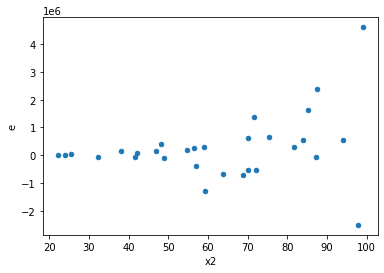

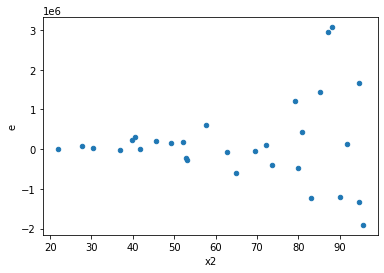

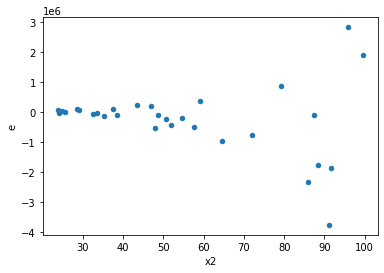

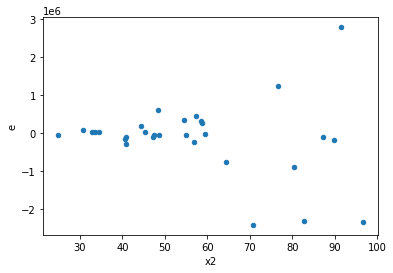

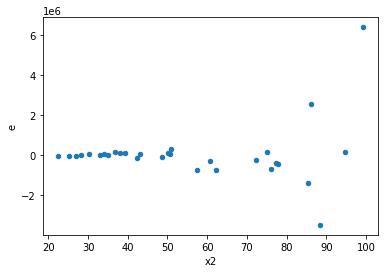

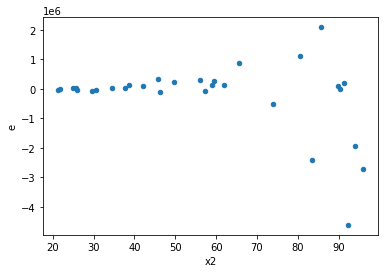

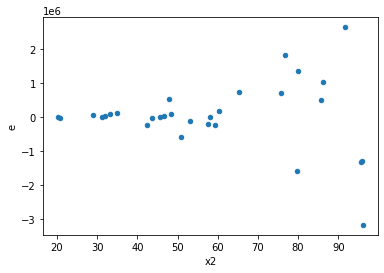

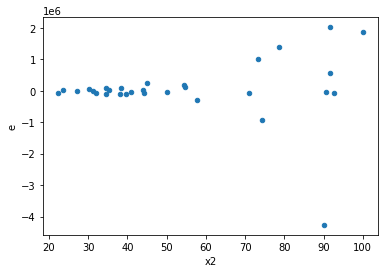

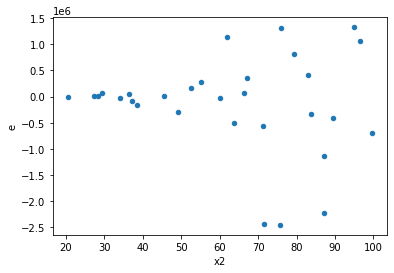

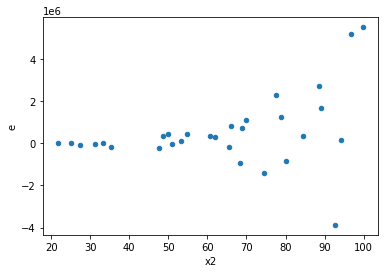

In [13]:
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [14]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
0.0,9.0,9.0,26840890609986.113,156009268049.27872,3355111326248.264,19501158506.15984,172.04676969260484,1.10436169098449e-08,0.9999999944781915,Reject001=0 : Heteroscedasticity
1.0,9.0,9.0,26252093571406.0,242826671765.5351,3281511696425.75,30353333970.691887,108.11042041030032,8.713929422476951e-08,0.9999999564303529,Reject001=0 : Heteroscedasticity
2.0,9.0,9.0,32947775193207.97,71678777569.00563,4118471899150.996,8959847196.125704,459.6587206232546,1.3618861594011378e-10,0.9999999999319057,Reject001=0 : Heteroscedasticity
3.0,9.0,9.0,16398710985922.006,134922183154.18498,2049838873240.2507,16865272894.273123,121.54199259570277,5.1830729930202324e-08,0.999999974084635,Reject001=0 : Heteroscedasticity
4.0,9.0,9.0,35737163381980.37,50489628150.33506,4467145422747.546,6311203518.7918825,707.8119742845284,1.9629187164582618e-11,0.9999999999901854,Reject001=0 : Heteroscedasticity
5.0,9.0,9.0,27152882940535.54,35017441068.230675,3394110367566.9424,4377180133.528834,775.4102559244342,1.3032686041469788e-11,0.9999999999934837,Reject001=0 : Heteroscedasticity
6.0,9.0,9.0,24072449123950.473,304498203162.1206,3009056140493.809,38062275395.265076,79.05612865352063,3.47669028233355e-07,0.9999998261654859,Reject001=0 : Heteroscedasticity
7.0,9.0,9.0,22777929985046.184,24535745804.994633,2847241248130.773,3066968225.624329,928.356943623429,5.806244374184644e-12,0.9999999999970969,Reject001=0 : Heteroscedasticity
8.0,9.0,9.0,10537671080105.09,162613338687.07327,1317208885013.1362,20326667335.88416,64.80200926434068,8.336141448239687e-07,0.9999995831929276,Reject001=0 : Heteroscedasticity


In [16]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,9.0,9.0,26840890609986.113,156009268049.27872,3355111326248.264,19501158506.15984,172.04676969260484,1.10436169098449e-08,Reject001=0 : Heteroscedasticity
1.0,9.0,9.0,26252093571406.0,242826671765.5351,3281511696425.75,30353333970.691887,108.11042041030032,8.713929422476951e-08,Reject001=0 : Heteroscedasticity
2.0,9.0,9.0,32947775193207.97,71678777569.00563,4118471899150.996,8959847196.125704,459.6587206232546,1.3618861594011378e-10,Reject001=0 : Heteroscedasticity
3.0,9.0,9.0,16398710985922.006,134922183154.18498,2049838873240.2507,16865272894.273123,121.54199259570277,5.1830729930202324e-08,Reject001=0 : Heteroscedasticity
4.0,9.0,9.0,35737163381980.37,50489628150.33506,4467145422747.546,6311203518.7918825,707.8119742845284,1.9629187164582618e-11,Reject001=0 : Heteroscedasticity
5.0,9.0,9.0,27152882940535.54,35017441068.230675,3394110367566.9424,4377180133.528834,775.4102559244342,1.3032686041469788e-11,Reject001=0 : Heteroscedasticity
6.0,9.0,9.0,24072449123950.473,304498203162.1206,3009056140493.809,38062275395.265076,79.05612865352063,3.47669028233355e-07,Reject001=0 : Heteroscedasticity
7.0,9.0,9.0,22777929985046.184,24535745804.994633,2847241248130.773,3066968225.624329,928.356943623429,5.806244374184644e-12,Reject001=0 : Heteroscedasticity
8.0,9.0,9.0,10537671080105.09,162613338687.07327,1317208885013.1362,20326667335.88416,64.80200926434068,8.336141448239687e-07,Reject001=0 : Heteroscedasticity


In [17]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    991
Reject001=1 : Homoscedasticity        9
Name: Result_test, dtype: int64